In [1]:
import numpy as np
import math
from math import exp
from math import sqrt
from random import uniform 
from random import seed
import matplotlib.pyplot as plt

In [2]:
def step(xi,yi,vxi,vyi,axi=0,ayi=0,dt=0.01):#the inital cordinateds for each step Velocity verlet
    
    #axi,ayi=F(xi,yi)#initial accelerations(nth step)
    
    vx_half=vxi + 0.5*axi*dt#velocity ast half points n+1/2
    vy_half=vyi + 0.5*ayi*dt
    
    xn=xi + vx_half*dt# new displacements displacements at n+1 step
    yn=yi + vy_half*dt 
    
    axn,ayn=F(xn,yn) #new accelerations (at n+1 step) 
    
    vxn=vx_half + 0.5*axn*dt # new velocity (at n+1 step)
    vyn=vy_half + 0.5*ayn*dt 

    return xn, yn , vxn , vyn, axn, ayn

def run(xinit,yinit,pxinit,pyinit,Steps=1000,dt=0.01):
    #print("Initial Py:",pyinit)
    axt,ayt=F(xinit,yinit)
    xt,yt=[xinit],[yinit]
    vxt,vyt=pxinit/mx,pyinit/my
    Px=[pxinit]
    Py=[pyinit]
    e=PES(xt[-1],yt[-1]) + 0.5*mx*vxt**2 + 0.5*my*vyt**2
    E=[e]
    for i in range(Steps):
        x_new, y_new, vxt, vyt, axt, ayt=step(xt[-1],yt[-1],vxt,vyt,axt,ayt,dt)
        xt.append(x_new)
        yt.append(y_new)
        Px.append(vxt*mx)
        Py.append(vyt*my)
        e=PES(xt[-1],yt[-1]) + 0.5*mx*vxt**2 + 0.5*my*vyt**2
        E.append(e)
    return xt,yt,Px,Py,E

def run_multP(xinit,yinit,NumTraj=10,steps=1000,dt=0.01,TotE=101):
    Xt=[]
    Yt=[]
    Vxt=[]
    Vyt=[]
    Et=[]
    for i in range(NumTraj):
        px,py,v=InitializeP(xinit,yinit,TotE)
        xt,yt,vxt,vyt,E=run(xinit,yinit,px,py,steps,dt)
        Xt.append(xt)
        Yt.append(yt)
        Et.append(E)
        Vxt.append(vxt)
        Vyt.append(vyt)
    return Xt,Yt,Vxt,Vyt,Et

def run_Till(xinit,yinit,pxinit,pyinit,Xend=3,MaxSteps=1000,dt=0.01):
    #print("Initial Py:",pyinit)
    axt,ayt=F(xinit,yinit)
    xt,yt=[xinit],[yinit]
    vxt,vyt=pxinit/mx,pyinit/my
    Vx=[vxt]
    Vy=[vyt]
    V=[PES(xt[-1],yt[-1])]
    e=V[-1] + 0.5*mx*vxt**2 + 0.5*my*vyt**2
    E=[e]
    i=0
    while xt[-1]<Xend:
        if i>MaxSteps:
            break
        x_new, y_new, vxt, vyt, axt, ayt=step(xt[-1],yt[-1],vxt,vyt,axt,ayt,dt)
        xt.append(x_new)
        yt.append(y_new)
        Vx.append(vxt)
        Vy.append(vyt)
        v=PES(xt[-1],yt[-1])#+0.5*m*(vxt**2+vyt**2)
        V.append(v)
        e=PES(xt[-1],yt[-1]) + 0.5*mx*vxt**2 + 0.5*my*vyt**2
        E.append(e)
        i+=1
    return xt,yt,Vx,Vy,E,V

In [5]:
def PES(x,y):
    q2=180*y/3.141
    V1=-b1*q2**2+B1*q2**4+De*(1-exp(-a*(x-1.5)))**2+V_1
    S1=1/(1+exp(-sw1*(x-spx1)))
    V2=-a2*(x-2.1)**2+V_2-b2*q2**2+B2*q2**4+Sl*exp(fl*(x-ex1))
    V3=-CpW*exp((-k2/(x-1)**4)*q2**2)-by*q2**2 +By*q2**4+V_3
    S2=1/(1+exp(-sw2*(x-spx2)))
    v=V1*(1-S1)+S1*V2*(1-S2)+S2*V3
    return v#*418.39#in a.m.u*Angstrom/(Picosecond)^2

#function initializing variables
def Initialize(Xrange=[-15,15],Yrange=[-10,10],TotE=120): 
    x,y=uniform(Xrange[0],Xrange[1]),uniform(Yrange[0],Yrange[1])
    V=PES(x,y)
    KE=(TotE-V)#in a.m.u*Angstrom/(Picosecond)^2
    KEx=uniform(0,KE)
    KEy=KE-KEx
    
    sign=uniform(-1,1)
    sign=sign/abs(sign)
    px=sign*sqrt(KEx*2*mx)
    
    sign=uniform(-1,1)
    sign=sign/abs(sign)
    py=sign*sqrt(KEy*2*my)

    return x,y,px,py,V

def py(x,y,px,TotE=120):
    V=PES(x,y)
    KE=(TotE-V)
    s=uniform(-1,1)
    s=s/abs(s)
    py=s*sqrt(my*(2*KE-px**2/mx))
    return py

def InitializeP(x,y,TotE=ET): 
    V=PES(x,y)
    KE=(TotE-V)*418.4
    KEx=uniform(0,KE)
    KEy=KE-KEx
    
    sign=uniform(-1,1)
    sign=sign/abs(sign)
    px=sign*sqrt(KEx*2*mx)
    
    sign=uniform(-1,1)
    sign=sign/abs(sign)
    py=sign*sqrt(KEy*2*my)

    return px,py,V

def F(x,y): #return accelarations; inputs: x(in angstroms), y(in radians); outputs: Ax(Kcal/Angstrom),Ay(Kcal/rad)  
    #Energy Functions
    q2=y*180/3.141#radian to degree conversion
    V1=-b1*q2**2+B1*q2**4+De*(1-exp(-a*(x-1.5)))**2+V_1
    S1=1/(1+exp(-sw1*(x-spx1)))
    V2=-a2*(x-2.1)**2+V_2-b2*q2**2+B2*q2**4+Sl*exp(fl*(x-ex1))
    V3=-CpW*exp((-k2/(x-1)**4)*q2**2)-by*q2**2 +By*q2**4+V_3
    S2=1/(1+exp(-sw2*(x-spx2)))
    #Derivative functions
    dS1 = sw1*S1*(1-S1)
    dS2 = sw2*S2*(1-S2)

    dV1_dx = 2*De*a*(1-exp(-a*(x-1.5)))*exp(-a*(x-1.5))
    dV1_dy = -2*b1*q2+4*B1*q2**3

    dV2_dx = -2*a2*(x-2.1)+Sl*fl*exp(fl*(x-ex1))
    dV2_dy = -2*b2*q2+4*B2*q2**3

    dV3_dx = (-4*k2*q2**2*CpW/(x-1)**5)*exp((-k2/(x-1)**4)*q2**2)#derivatives(kcal/A)
    dV3_dy = (2*k2*q2*CpW/(x-1)**4)*exp((-k2/(x-1)**4)*q2**2) - 2*by*q2 + 4*By*q2**3#(Kcal/degre)

    Fx=-(dV1_dx*(1-S1) - V1*dS1 + dS1*V2*(1-S2) - dS2*S1*V2 + S1*(1-S2)*dV2_dx + dS2*V3 + S2*dV3_dx)#Force in x direction,unit is Kcal/degree
    Fy=-((1-S1)*dV1_dy + S1*(1-S2)*dV2_dy + S2*dV3_dy)#Torque in y direction
    #unit conversion is needed
    ax=Fx/mx#*418.39#linear acceleration; unit:Angstrom/s^2
    ay=Fy*180/(3.141*my)#*418.39# angular acceleration; unit: 1/s^2. 180/3.141 multiplied ofr conersion back to radians

    # Kcal/degree is converted to Kcal/rad in the nest line
    return ax,ay 
 

In [4]:
#variables
sw2 = 17
spx2 = 2.6
CpW = 58.1
k2 = 0.4
by = 0.0035
By = 1.2e-06
V_3 = 15.5
a2 = 150
V_2 = 44.2
b2 = 0.00499
B2 = 1.35e-06
Sl = 1.7
fl = 9
ex1 = 2.3
sw1 = 15
spx1 = 1.9
b1 = 0.0011
B1 = 1.79904862716992e-06
De = 57.2617535188108
a = 3.1
V_1 = 0.196

ET=120#*418.39#The total energy of the system in a.m.u*Angstrom/(Picosecond)^2
mx=3.45# linear reduced mass 
my=1.6898# the moment of inertia for the rotation; unit Kg*A^2

In [17]:
from time import time
import os

dt=1e-3#time unit is picosecond
TotalTime=1#time unit is picosecond
Steps=int(TotalTime/dt)

xinit,yinit,pxinit,pyinit,V_0=Initialize([1.4,1.6],[-0.15,0.15],ET)


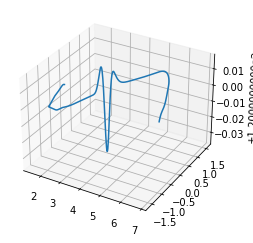

relative error in E=0.0004514104123000394
Initial Conditions:1.4978707162570315	-0.13752731228829107	18.57158368981018	-15.370156834823398	0.11168072306644446
Final Conditions:6.821070392908549	-0.7766655154170827	21.991423555276917	-14.909460985092853	0.11168072306644446


In [18]:
X,Y,Px,Py,E=run(xinit,yinit,pxinit,pyinit,Steps,dt)

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot(X,Y,E)
plt.show()

Xi=np.copy(X)
Yi=np.copy(Y)

T=[dt*i for i in range(Steps+1)]

print(f"relative error in E={(max(E)-min(E))/min(E)}")
print(f"Initial Conditions:{xinit}\t{yinit}\t{pxinit}\t{pyinit}\t{V_0}")
print(f"Final Conditions:{X[-1]}\t{Y[-1]}\t{Px[-1]}\t{Py[-1]}\t{V_0}")

Initial Conditions:6.821070392908549	-0.7766655154170827	-21.991423555276917	14.909460985092853
Final Conditions:1.4978707162570313	-0.13752731228829077	-18.571583689810165	15.370156834823401
Error in X,Y,Vx,Vy=2.220446049250313e-16	-3.0531133177191805e-16	1.4210854715202004e-14	3.552713678800501e-15


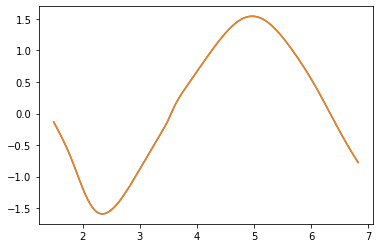

In [19]:
xl,yl,pxl,pyl=X[-1],Y[-1],Px[-1],Py[-1]
X,Y,Px,Py,E=run(xl,yl,-pxl,-pyl,Steps,dt)
print(f"Initial Conditions:{xl}\t{yl}\t{-pxl}\t{-pyl}")
print(f"Final Conditions:{X[-1]}\t{Y[-1]}\t{Px[-1]}\t{Py[-1]}")
print(f"Error in X,Y,Vx,Vy={xinit-X[-1]}\t{yinit-Y[-1]}\t{pxinit+Px[-1]}\t{pyinit+Py[-1]}")

#print(E,Vx)
#plt.plot(T,E)
plt.plot(X,Y)
plt.plot(Xi,Yi)

In [ ]:
Vy

In [ ]:
Xplot=np.linspace(1.3,5,50)
Yplot=np.linspace(-80*3.141/180,80*3.141/180,50)
Q1=[]
Q2=[]
En=[]
for x in Xplot:
    for y in Yplot:
        e=PES(x,y)
        Q1.append(x)
        Q2.append(y)
        En.append(e)

In [ ]:
len(Y)
%matplotlib qt

In [ ]:
fig=plt.figure(figsize=(15,10))
ax=plt.axes(projection='3d')
APES=ax.scatter(Q1,Q2,En,c=En,cmap='winter', linewidth=0.5,label='Analytical PES')
traj=ax.scatter(X,Y,E,c=T,cmap='viridis')
plt.title("Error in analytical approximation 4")
plt.xlabel("X")
plt.ylabel("Y")
#ax.set_zlim3d(119,121)
plt.legend()
#plt.savefig("error_analytical4.png",dpi=650)
#plt.colorbar(traj)